# Import Dataset

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [2]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


# Data Preprocessing

In [31]:
df = df.drop(columns = ['url', 'address', 'phone', 'menu_item', 'location', 'reviews_list'], axis = 1)
def clean_rate(value):
    try:
        return float(value.split('/')[0])
    except:
        return np.nan

df['rate'] = df['rate'].apply(clean_rate)

df.rename(columns={'listed_in(type)': 'type', 'listed_in(city)': 'city', 'approx_cost(for two people)': 'cost'}, inplace=True)

df.head(1)

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari


In [11]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            51717
votes               0
rest_type         227
dish_liked      28078
cuisines           45
cost              346
type                0
city                0
dtype: int64

In [12]:
df = df.dropna()
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
rest_type       0
dish_liked      0
cuisines        0
cost            0
type            0
city            0
dtype: int64

In [32]:
# Rename columns for convenience
df.rename(columns={'listed_in(type)': 'type', 'listed_in(city)': 'city', 'approx_cost(for two people)': 'cost'}, inplace=True)

# Replace commas in 'votes' and 'cost' and convert to numeric
df['votes'] = df['votes'].replace(',', '', regex=True)
df['cost'] = df['cost'].replace(',', '', regex=True)

df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

# Drop rows with missing values only in the relevant columns
df = df.dropna(subset=['rate', 'votes', 'cost'])

In [33]:
# Encode 'book_table' column using LabelEncoder (assuming it's categorical yes/no)
le = LabelEncoder()
df['book_table'] = le.fit_transform(df['book_table'])

# Scale numerical columns
sc = StandardScaler()
scaled_features = sc.fit_transform(df[['rate', 'votes', 'cost']])

# One-hot encode categorical columns
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_cols = df[['name', 'rest_type', 'dish_liked', 'cuisines', 'type', 'city']]
categorical_encoded = ohe.fit_transform(categorical_cols)

# Prepare features matrix
X = np.concatenate([categorical_encoded, scaled_features, df[['book_table']].values], axis=1)

# Assuming 'online_order' is the target
le_online = LabelEncoder()
y = le_online.fit_transform(df['online_order'])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (41418, 14346)
Shape of y: (41418,)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# EDA - Exploratory Data Analysis

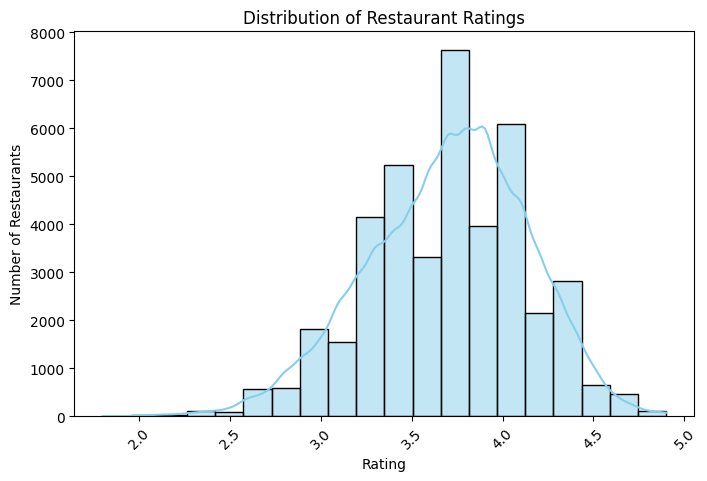

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['rate'].dropna(), kde=True, bins=20, color='skyblue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

C:\Users\s\AppData\Local\Temp\ipykernel_18372\2520851118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='online_order', data=df, palette='Set2')


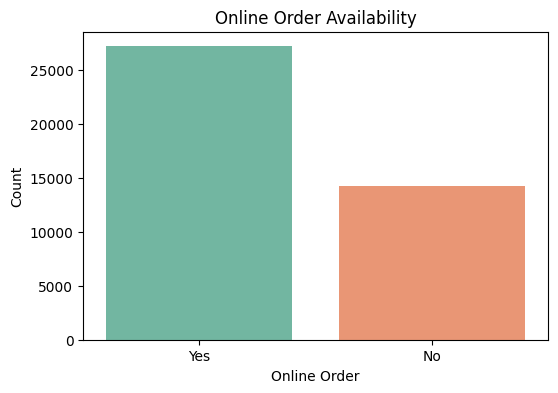

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x='online_order', data=df, palette='Set2')
plt.title('Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()

C:\Users\s\AppData\Local\Temp\ipykernel_18372\565533362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='book_table', data=df, palette='pastel')


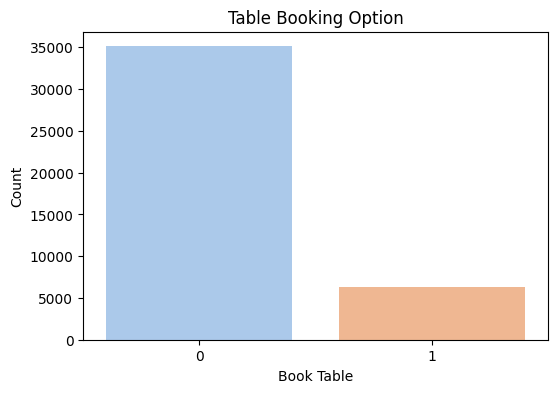

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='book_table', data=df, palette='pastel')
plt.title('Table Booking Option')
plt.xlabel('Book Table')
plt.ylabel('Count')
plt.show()

C:\Users\s\AppData\Local\Temp\ipykernel_18372\3809661429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rest_types.index, y=top_rest_types.values, palette='coolwarm')


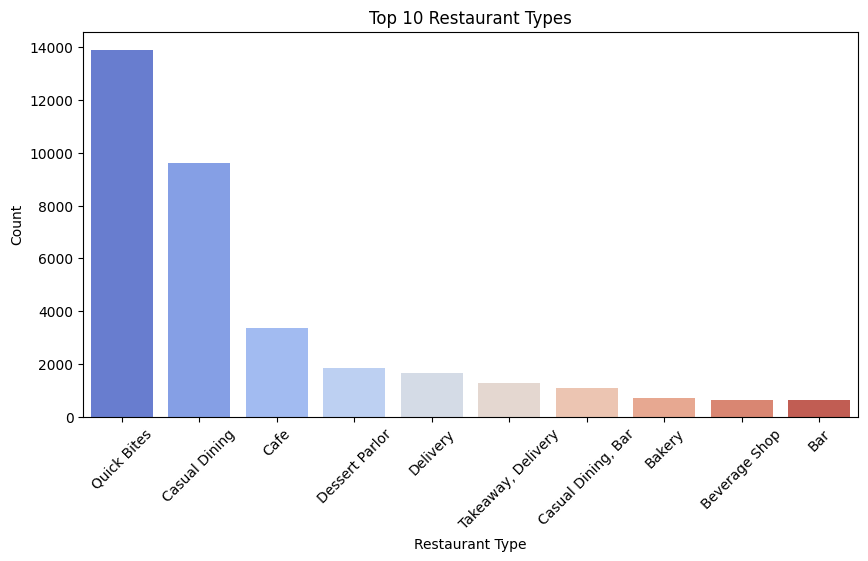

In [38]:
top_rest_types = df['rest_type'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_rest_types.index, y=top_rest_types.values, palette='coolwarm')
plt.title('Top 10 Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


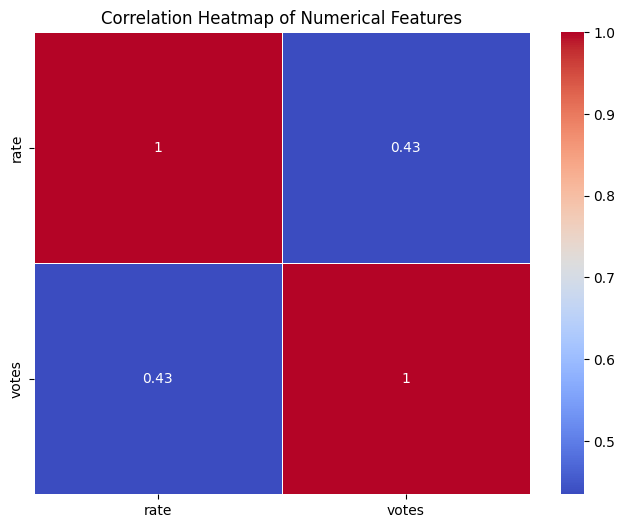

In [42]:
# Clean the 'rate' column (remove '/5', convert to float)
df['rate'] = df['rate'].astype(str).str.replace('/5', '', regex=False)
df['rate'] = df['rate'].replace({'NEW': None, '-': None})
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Convert 'votes' to numeric (if not already)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df[['rate', 'votes']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Model Training

In [43]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()
logi.fit(X_train, y_train)

C:\Users\s\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred = logi.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [45]:
from sklearn.metrics import accuracy_score
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Accuracy Score: 0.917189763399324
